# JUPYTER GROUPE 4 - Sulivan TULOUP, Tom NORMAND, Hichem CHERAFI

IMPORTER LES DONNEES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp -r /content/data_IA_HFY /content/drive/MyDrive/data_IA_HFY

cp: cannot stat '/content/data_IA_HFY': No such file or directory


In [5]:
 from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/general_data.csv')
# print(df.head())

# Afficher les premières lignes du dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Quelque infos sur le nombre et le poucentage d'employé partie dans le jeu de donnée a notre disposition

In [ ]:
import pandas as pd

# Charger les données
df = pd.read_csv("/content/drive/MyDrive/data_IA_HFY/general_data.csv", delimiter=",")  # Adapter le séparateur si besoin

# Afficher le nombre de collaborateurs partis et restants
print(df["Attrition"].value_counts())

# Calculer le taux d'attrition
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
print(attrition_rate)

Attrition
No     3699
Yes     711
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Le code suivant analyse les horaires d'arrivée et de départ des employés à partir des deux fichiers fournie. Il calcule les heures travaillées par employé pour chaque journée. Ensuite, un score de présence est généré en fonction du temps passé au travail. Les données sont consolidées et exportées dans un fichier CSV pour faciliter l'analyse. Ce script nous donne un fichier attendance_summary.csv

In [ ]:
import pandas as pd

def clean_file(input_file, output_file):
    try:
        # Charger le fichier en désactivant les erreurs liées au parsing
        with open(input_file, 'r') as file:
            lines = file.readlines()

        # Nettoyer chaque ligne en supprimant les guillemets
        cleaned_lines = [line.replace('"', '') for line in lines]

        # Sauvegarder le fichier nettoyé
        with open(output_file, 'w') as file:
            file.writelines(cleaned_lines)

        print(f"Le fichier {input_file} a été nettoyé et sauvegardé dans {output_file}")
    except Exception as e:
        print(f"Erreur lors du nettoyage du fichier {input_file}: {e}")

# Fichiers d'entrée et de sortie
time_in_file = "/content/drive/MyDrive/data_IA_HFY/in_out_time/in_time.csv"
time_out_file = "/content/drive/MyDrive/data_IA_HFY/in_out_time/out_time.csv"

cleaned_time_in_file = "/content/drive/MyDrive/data_IA_HFY/in_out_time/in_time_cleaned.csv"
cleaned_time_out_file = "/content/drive/MyDrive/data_IA_HFY/in_out_time/out_time_cleaned.csv"

# Nettoyer les fichiers
clean_file(time_in_file, cleaned_time_in_file)
clean_file(time_out_file, cleaned_time_out_file)


Le fichier /content/drive/MyDrive/data_IA_HFY/in_out_time/in_time.csv a été nettoyé et sauvegardé dans /content/drive/MyDrive/data_IA_HFY/in_out_time/in_time_cleaned.csv
Le fichier /content/drive/MyDrive/data_IA_HFY/in_out_time/out_time.csv a été nettoyé et sauvegardé dans /content/drive/MyDrive/data_IA_HFY/in_out_time/out_time_cleaned.csv


In [ ]:
import pandas as pd
import csv

# Charger les fichiers 'in_time.csv' et 'out_time.csv'
in_file_path = '/content/drive/MyDrive/data_IA_HFY/in_out_time/in_time.csv'
out_file_path = '/content/drive/MyDrive/data_IA_HFY/in_out_time/out_time.csv'

# Function to clean and load data, handling potential errors
def load_and_clean_csv(file_path):
    try:
        # Read the CSV, skipping bad lines and treating quotes as regular characters
        df = pd.read_csv(
            file_path,
            sep=',',
            quotechar='"',
            on_bad_lines='skip',
            quoting=csv.QUOTE_NONE,
            encoding='utf-8',  # Explicitly set encoding if needed
            engine='python'  # Use the Python engine for more flexibility
        ).applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

        # Clean the first column name (EmployeeID)
        df.columns = [col.strip('"').strip() for col in df.columns]

        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load and clean the data
in_data = load_and_clean_csv(in_file_path)
out_data = load_and_clean_csv(out_file_path)

if in_data is not None and out_data is not None:
    # Print the column names of in_data to verify
    print(in_data.columns)

    # Reformat data into long format
    in_long = in_data.melt(id_vars=[in_data.columns[0]], var_name='Date', value_name='InTime')
    out_long = out_data.melt(id_vars=[out_data.columns[0]], var_name='Date', value_name='OutTime')

    # Merge the two files on 'EmployeeID' and 'Date'
    merged_data = pd.merge(in_long, out_long, on=[in_data.columns[0], 'Date'], how='inner')

    # Convert InTime and OutTime columns to datetime
    merged_data['InTime'] = pd.to_datetime(merged_data['InTime'], errors='coerce')
    merged_data['OutTime'] = pd.to_datetime(merged_data['OutTime'], errors='coerce')

    # Calculate hours worked
    merged_data['HoursWorked'] = (merged_data['OutTime'] - merged_data['InTime']).dt.total_seconds() / 3600

    # Remove rows with invalid values (NA)
    cleaned_data = merged_data.dropna(subset=['InTime', 'OutTime', 'HoursWorked'])

    # Save the result to a CSV file
    cleaned_data.to_csv('/content/drive/MyDrive/data_IA_HFY/in_out_time/cleaned_work_data.csv', index=False)

    # Display a preview of the cleaned and merged data
    print(cleaned_data.head())
else:
    print("Error loading data. Please check the CSV files and paths.")

<ipython-input-32-d7b23e7ecb67>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ).applymap(lambda x: x.strip('"') if isinstance(x, str) else x)
<ipython-input-32-d7b23e7ecb67>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ).applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


Index(['', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)
               Date              InTime             OutTime  HoursWorked
2404  1  2015-01-02 2015-01-02 09:43:45 2015-01-02 16:56:15     7.208333
2405  2  2015-01-02 2015-01-02 10:15:44 2015-01-02 18:22:17     8.109167
2406  3  2015-01-02 2015-01-02 10:17:41 2015-01-02 16:59:14     6.692500
2407  4  2015-01-02 2015-01-02 10:05:06 2015-01-02 17:25:24     7.338333
2408  5  2015-01-02 2015-01-02 10:28:17 2015-01-02 18:31:37     8.055556


In [ ]:
import pandas as pd

# Load the cleaned work data
cleaned_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/in_out_time/cleaned_work_data.csv')

# Group by EmployeeID and sum the HoursWorked
total_hours_per_employee = cleaned_data.groupby(cleaned_data.columns[0])['HoursWorked'].sum().reset_index()

# Rename the columns for clarity
total_hours_per_employee.columns = ['EmployeeID', 'TotalHoursWorked']

# Calculate attendance rate (assuming a 40-hour work week)
total_hours_per_employee['AttendanceRate'] = (total_hours_per_employee['TotalHoursWorked'] / (40 * len(cleaned_data['Date'].unique())/7 )) * 100

# Save the attendance data to a new CSV file
total_hours_per_employee.to_csv('/content/drive/MyDrive/data_IA_HFY/in_out_time/attendance_summary.csv', index=False)

# Display the attendance summary
print(total_hours_per_employee.head())

   EmployeeID  TotalHoursWorked  AttendanceRate
0           1       1710.686944      120.229002
1           2       1821.676667      128.029485
2           3       1697.204167      119.281417
3           4       1690.514444      118.811256
4           5       1961.512778      137.857324


In [ ]:
import pandas as pd

# Load the CSV files
general_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/general_data.csv')
attendance_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/in_out_time/attendance_summary.csv')
employee_survey_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/employee_survey_data.csv')
manager_survey_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/manager_survey_data.csv')

# Merge the DataFrames
merged_data = pd.merge(general_data, attendance_data, on='EmployeeID', how='left')
merged_data = pd.merge(merged_data, employee_survey_data, on='EmployeeID', how='left')
merged_data = pd.merge(merged_data, manager_survey_data, on='EmployeeID', how='left')

# Save the merged data to a new CSV file
merged_data.to_csv('/content/drive/MyDrive/data_IA_HFY/merged_data.csv', index=False)

# Display the first few rows of the merged data
print(merged_data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   YearsAtCompany YearsSinceLastPromotion YearsWithCurrManager  \
0               1   

On va maintenant integré les données des enquettes ainsi que les donnée de presence au data general pour chaque employés.

## 1. Gestion des valeurs aberrantes et manquantes

In [ ]:
import pandas as pd
import numpy as np

def identify_and_count_outliers(file_path, multiplier=3, exclude_cols=['YearsAtCompany', 'YearsSinceLastPromotion', 'PerformanceRating']):
    # Load the data
    df = pd.read_csv(file_path)

    # Select numerical columns (excluding specified columns)
    numerical_cols = df.select_dtypes(include=['number']).columns
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    # Create a dictionary to store outlier counts and values
    outlier_data = {}

    # Calculate and store outlier data for each numerical column
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_data[col] = {'Outlier Count': len(outliers), 'Outlier Values': tuple(outliers)}

    # Create a DataFrame from the outlier data
    outlier_df = pd.DataFrame.from_dict(outlier_data, orient='index')

    return outlier_df

file_path = '/content/drive/MyDrive/data_IA_HFY/merged_data.csv'
outlier_report = identify_and_count_outliers(file_path)
print(outlier_report)

                         Outlier Count  \
Age                                  0   
DistanceFromHome                     0   
Education                            0   
EmployeeCount                        0   
EmployeeID                           0   
JobLevel                             0   
MonthlyIncome                        0   
NumCompaniesWorked                   0   
PercentSalaryHike                    0   
StandardHours                        0   
StockOptionLevel                     0   
TotalWorkingYears                    0   
TrainingTimesLastYear                0   
YearsWithCurrManager                 0   
TotalHoursWorked                     5   
AttendanceRate                       5   
EnvironmentSatisfaction              0   
JobSatisfaction                      0   
WorkLifeBalance                      0   
JobInvolvement                       0   

                                                            Outlier Values  
Age                                     

On remplace les valeurs aberrantes par la valeurs mediane:

In [ ]:
import pandas as pd
import numpy as np

def replace_outliers_with_median_inplace(file_path, multiplier=3, exclude_cols=['YearsAtCompany', 'YearsSinceLastPromotion', 'PerformanceRating']):
    """
    Replaces outliers in numerical columns of a CSV file with the median,
    excluding specified columns, and modifies the file in-place.

    Args:
        file_path (str): The path to the CSV file.
        multiplier (float): The multiplier used with the IQR to define
                            outlier bounds. Defaults to 3.
        exclude_cols (list): A list of column names to exclude from outlier handling.
    """
    # Load the data
    df = pd.read_csv(file_path)

      # Select numerical columns (excluding specified columns)
    numerical_cols = df.select_dtypes(include=['number']).columns
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]  # Removed 'Attrition' exclusion

    # Replace outliers with the median for each numerical column
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Replace outliers with the median
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                            df[col].median(), df[col])

    # Save the modified data back to the original file
    df.to_csv(file_path, index=False)

file_path = '/content/drive/MyDrive/data_IA_HFY/merged_data.csv'
replace_outliers_with_median_inplace(file_path)

In [ ]:
import pandas as pd

# Load the merged data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data.csv')

# Print the sum of null values for each column
print(merged_data.isnull().sum())

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           19
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             9
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
TotalHoursWorked           3025
AttendanceRate             3025
EnvironmentSatisfaction      25
JobSatisfaction              20
WorkLifeBalance              38
JobInvolvement                0
PerformanceRating             0
dtype: i

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the merged data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data.csv')

# Separate numerical and categorical columns
numerical_cols = merged_data.select_dtypes(include=['number']).columns
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')
merged_data[numerical_cols] = numerical_imputer.fit_transform(merged_data[numerical_cols])

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
merged_data[categorical_cols] = categorical_imputer.fit_transform(merged_data[categorical_cols])

# Verify if there are any remaining missing values
print(merged_data.isnull().sum())

# Save the imputed data to a new CSV file
merged_data.to_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_imputed.csv', index=False)

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
TotalHoursWorked           0
AttendanceRate             0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


## 2. Normalisation des données

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_imputed.csv')

# Drop EmployeeID, EmployeeCount, and Gender
merged_data = merged_data.drop(columns=['EmployeeID', 'EmployeeCount', 'Gender'])

# Encode Attrition to 0/1 before scaling
merged_data['Attrition'] = merged_data['Attrition'].map({'No': 0, 'Yes': 1})

# Separate numerical and categorical data
numerical_data = merged_data.select_dtypes(include=['number'])
categorical_data = merged_data.select_dtypes(exclude=['number'])

# Select numerical columns for scaling, excluding 'Attrition'
numerical_cols_to_scale = [col for col in numerical_data.columns if col != 'Attrition']

# Apply StandardScaler to numerical data (excluding 'Attrition')
scaler = StandardScaler()
numerical_data[numerical_cols_to_scale] = scaler.fit_transform(numerical_data[numerical_cols_to_scale])

# Merge the normalized numerical data back with the categorical data
normalized_data = pd.concat([numerical_data, categorical_data], axis=1)

# Save the normalized data
normalized_data.to_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_normalized.csv', index=False)

print(normalized_data.head())

        Age  Attrition  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0  1.541369          0         -0.393938  -0.891688 -0.961486       1.405136   
1 -0.648668          1          0.099639  -1.868426 -0.961486      -0.491661   
2 -0.539166          0          0.963398   1.061787  1.749610       2.725053   
3  0.117845          0         -0.887515   2.038524  0.845911       0.386301   
4 -0.539166          0          0.099639  -1.868426 -0.961486      -0.884109   

   NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0           -0.678464          -1.150554            0.0         -0.932014   
1           -1.079486           2.129306            0.0          0.241988   
2           -0.678464          -0.057267            0.0          2.589994   
3            0.123580          -1.150554            0.0          2.589994   
4            0.524602          -0.877232            0.0          1.415991   

   ...  JobSatisfaction  WorkLifeBalance  JobInvolvement

## 3. Encodage des variables catégorielles

In [15]:
import pandas as pd

# Load the imputed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_normalized.csv')

# Get categorical columns
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Print the categorical columns and their unique values
print("Categorical variables and their unique values:")
for col in categorical_cols:
    unique_values = merged_data[col].unique()
    print(f"{col}: ({', '.join(map(str, unique_values))})")

Categorical variables and their unique values:
BusinessTravel: (Travel_Rarely, Travel_Frequently, Non-Travel)
Department: (Sales, Research & Development, Human Resources)
EducationField: (Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources)
JobRole: (Healthcare Representative, Research Scientist, Sales Executive, Human Resources, Research Director, Laboratory Technician, Manufacturing Director, Sales Representative, Manager)
MaritalStatus: (Married, Single, Divorced)
Over18: (Y)


In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the imputed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_normalized.csv')

# 1. Drop Over18 column
merged_data = merged_data.drop(columns=['Over18'])

# 3. One-hot encode other categorical variables
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for a dense array
encoded_data = encoder.fit_transform(merged_data[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df.index = merged_data.index # Align indices with original data

# Concatenate the encoded DataFrame with the original DataFrame
merged_data = pd.concat([merged_data, encoded_df], axis=1)

# Drop the original categorical columns
merged_data = merged_data.drop(columns=categorical_cols)

# Save the preprocessed data
merged_data.to_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv', index=False)

print(merged_data.head())

        Age  Attrition  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0  1.541369          0         -0.393938  -0.891688 -0.961486       1.405136   
1 -0.648668          1          0.099639  -1.868426 -0.961486      -0.491661   
2 -0.539166          0          0.963398   1.061787  1.749610       2.725053   
3  0.117845          0         -0.887515   2.038524  0.845911       0.386301   
4 -0.539166          0          0.099639  -1.868426 -0.961486      -0.884109   

   NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0           -0.678464          -1.150554            0.0         -0.932014   
1           -1.079486           2.129306            0.0          0.241988   
2           -0.678464          -0.057267            0.0          2.589994   
3            0.123580          -1.150554            0.0          2.589994   
4            0.524602          -0.877232            0.0          1.415991   

   ...  JobRole_Laboratory Technician  JobRole_Manager  

## 5. Séparation des caractéristiques (X) et de la cible (y)

In [17]:
# Séparation des caractéristiques et de la cible
import pandas as pd
# Load the processed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

X = merged_data.drop(columns=["Attrition"])  # Remplace "median_house_value" par ta variable cible
y = merged_data["Attrition"]  # Variable cible

# Vérification des dimensions
print(X.shape)
print(y.shape)

(4410, 45)
(4410,)


# Exploration et Visualisation des Données

In [18]:
# Séparation des caractéristiques et de la cible
import pandas as pd
# Load the processed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_imputed.csv')

merged_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalHoursWorked,AttendanceRate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,...,7.008163,2.187755,4.123129,3223.980270,226.584959,2.725170,2.729478,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,...,6.125135,3.221699,3.567327,561.234289,39.444177,1.089852,1.098904,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,1361.766111,95.706454,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,3.000000,0.000000,2.000000,3249.050556,228.346927,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,5.000000,1.000000,3.000000,3249.050556,228.346927,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,9.000000,3.000000,7.000000,3249.050556,228.346927,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,15.000000,17.000000,5405.200000,379.883534,4.000000,4.000000,4.000000,4.000000,4.000000


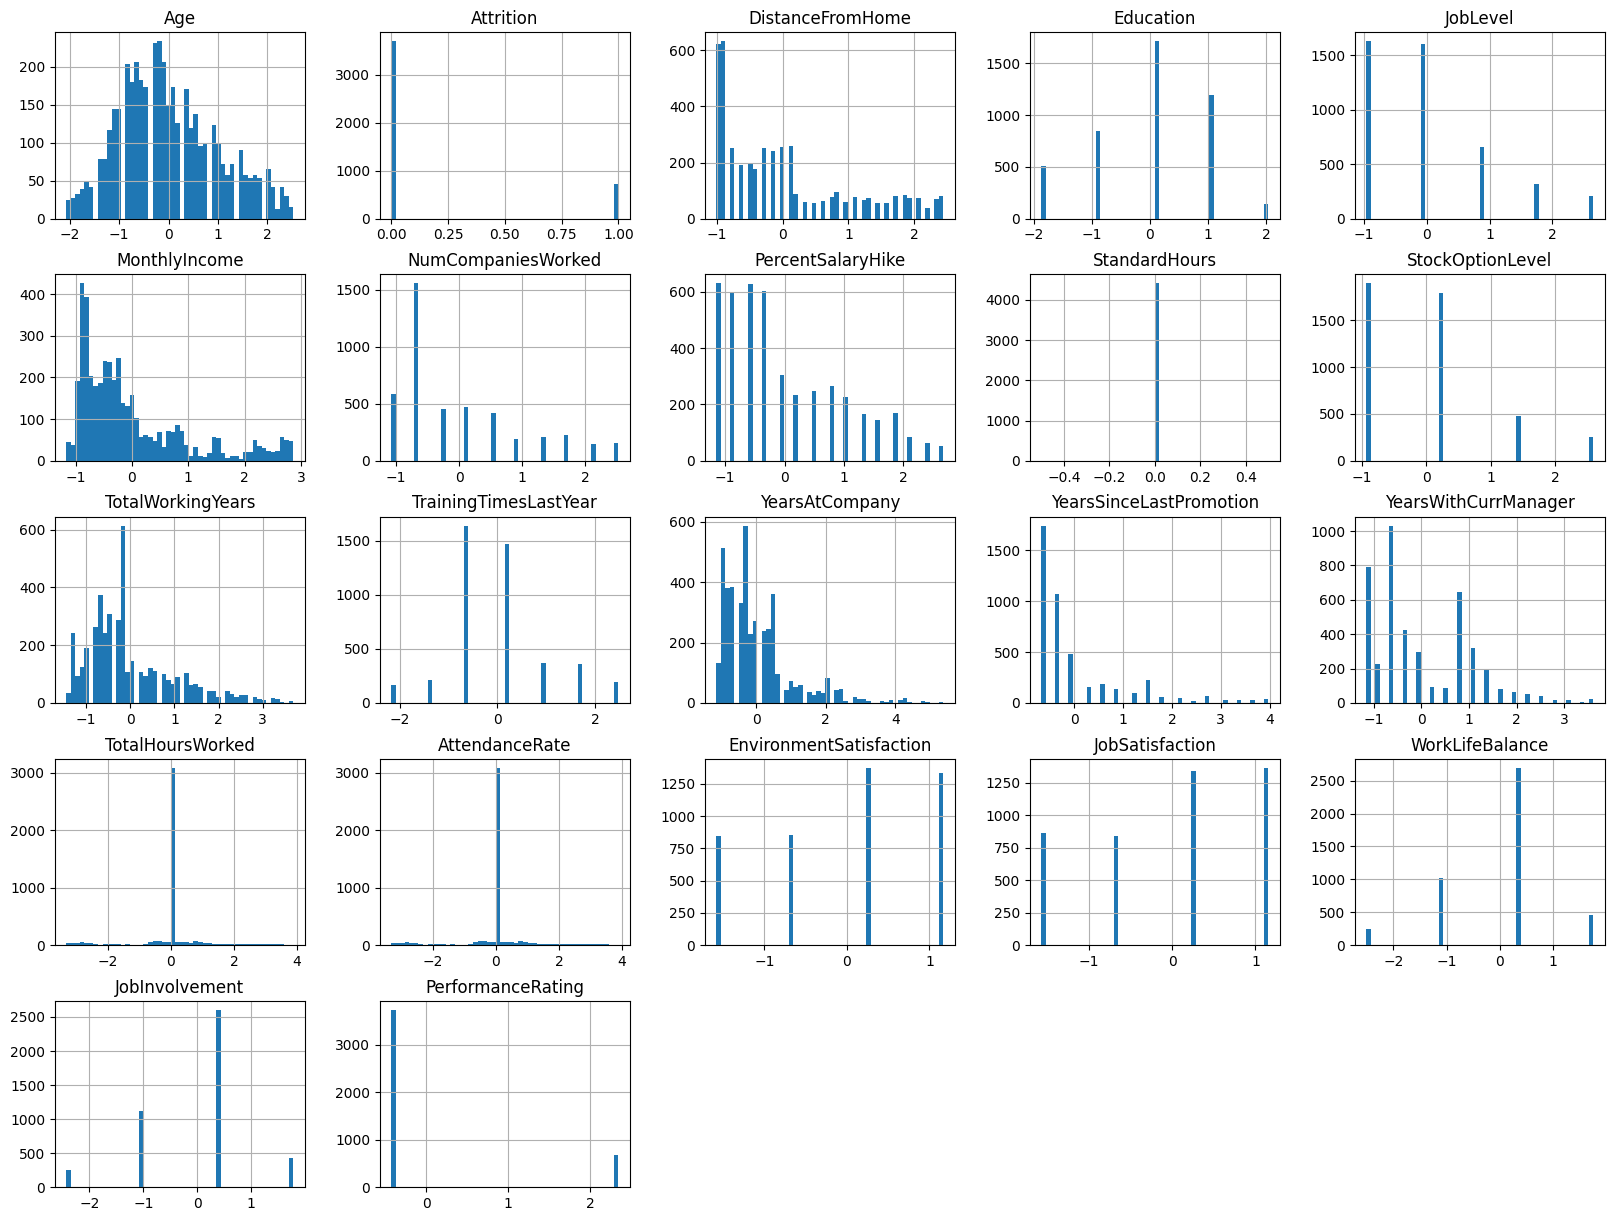

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the processed data if you haven't already
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_normalized.csv')

# Select only numerical features
numerical_data = merged_data.select_dtypes(include=['number'])

# Create histograms for numerical features
numerical_data.hist(bins=50, figsize=(20, 15))
plt.show()

## 3. Matrice de Corrélation

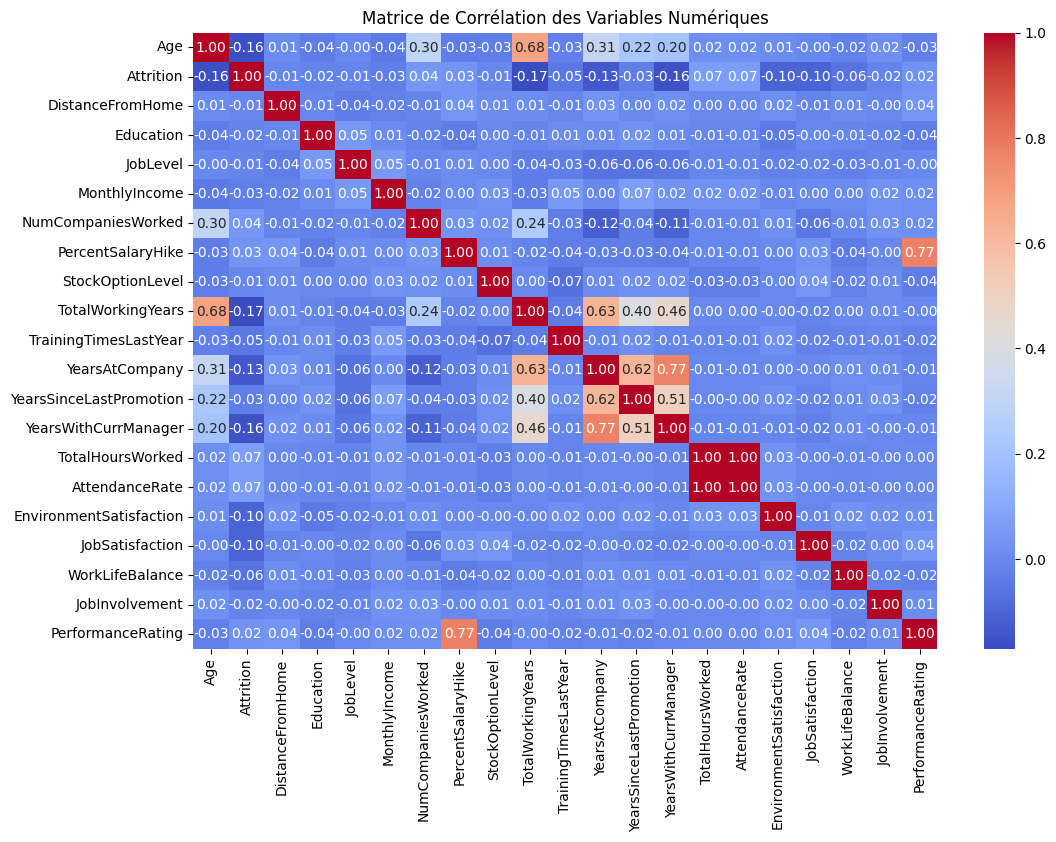

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
merged_data_processed = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_normalized.csv')

# Sélectionner les caractéristiques numériques, en excluant 'StandardHours'
numerical_features = merged_data_processed.select_dtypes(include=['number'])
numerical_features = numerical_features.drop(columns=['StandardHours'], errors='ignore')  # Ignorer l'erreur si 'StandardHours' n'existe pas

# Calculer la matrice de corrélation
corr_matrix = numerical_features.corr()

# Créer le heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


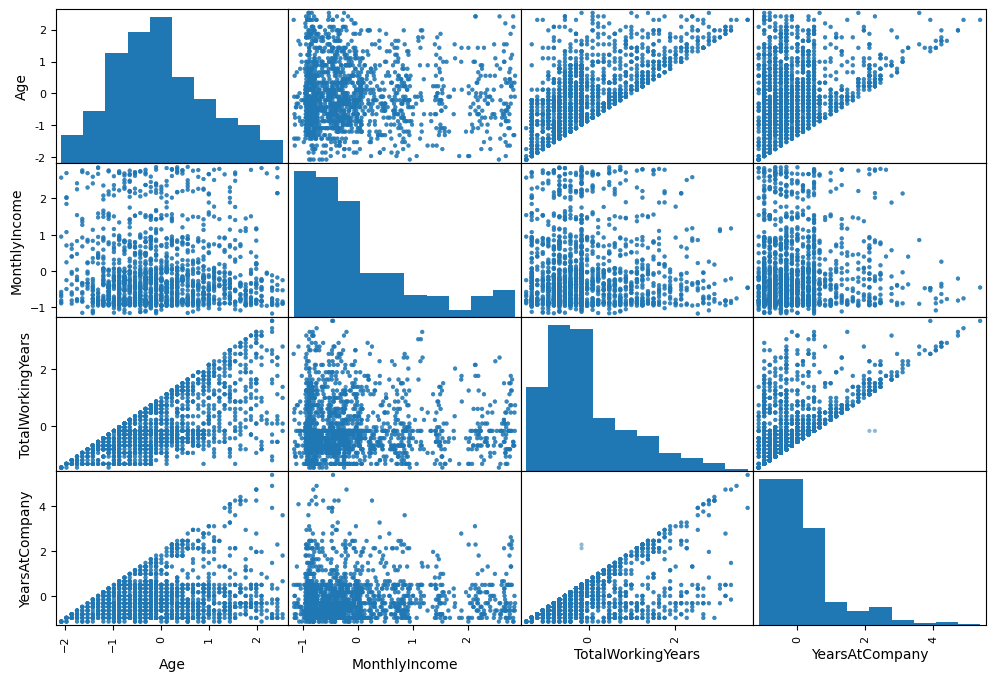

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

# Sélectionner les attributs pour la matrice de dispersion
attributes = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]  # Remplacez par vos attributs

# Créer la matrice de dispersion
scatter_matrix = pd.plotting.scatter_matrix(merged_data[attributes], figsize=(12, 8))

# Afficher la matrice
plt.show()

## Interprétation des Résultats : Matrice de Dispersion

La matrice de dispersion affiche les relations entre les paires d'attributs sélectionnés.

### Diagonale :
- Les graphiques sur la diagonale sont des **histogrammes**, montrant la distribution de chaque attribut individuel.  
  - **À observer** :  
    - La forme de la distribution (symétrique, asymétrique, etc.).  
    - La présence de valeurs aberrantes.  
    - La concentration des données.

### Hors Diagonale :
- Les graphiques hors diagonale sont des **nuages de points (scatter plots)**, montrant la relation entre deux attributs différents.  

### Types de Corrélation :
1. **Corrélation positive** :  
   - Les points montent de gauche à droite.  
   - Cela indique que lorsque **un attribut augmente**, l'autre a tendance à **augmenter aussi**.
   
2. **Corrélation négative** :  
   - Les points descendent de gauche à droite.  
   - Cela indique que lorsque **un attribut augmente**, l'autre a tendance à **diminuer**.
   
3. **Absence de corrélation** :  
   - Les points sont dispersés sans tendance claire.  
   - Cela suggère une faible ou une absence de corrélation entre les deux attributs.

### Forme de la Relation :
- La forme du nuage de points peut révéler des **relations non linéaires** (courbes, clusters, etc.).


### 5. Analyse de la Variable Cible
Analysons la variable cible attrition pour voir comment elle est distribuée.

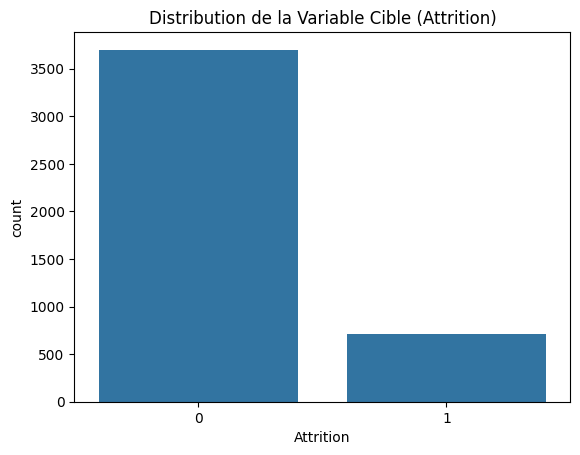

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the processed data if you haven't already
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

# Replace 'housing' with 'merged_data' in the countplot function
sns.countplot(x='Attrition', data=merged_data)
plt.title('Distribution de la Variable Cible (Attrition)') # Corrected title
plt.show()

## 6. Relations entre les Variables et la Cible
Examinons comment certaines variables influencent la probabilité de depart

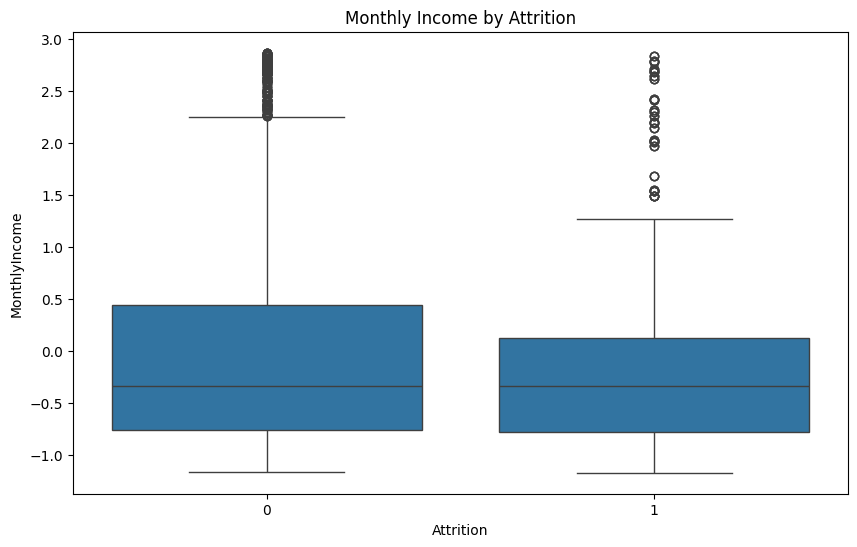

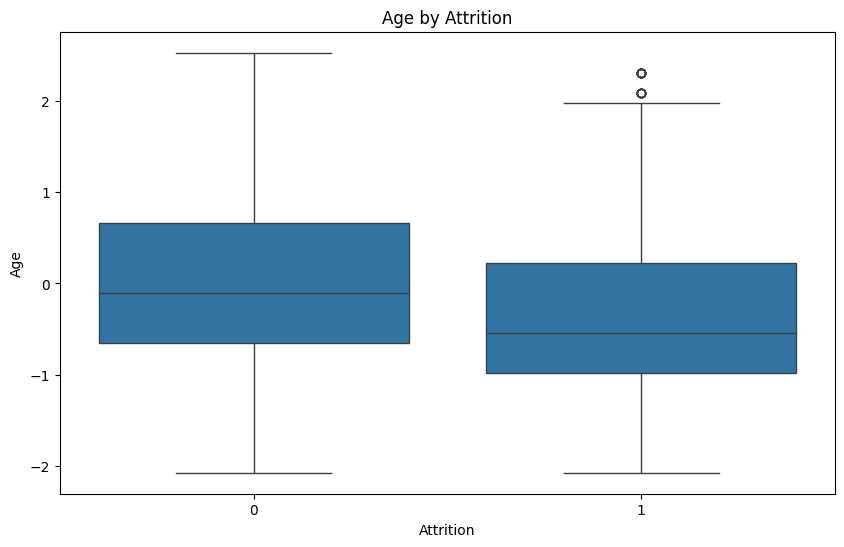

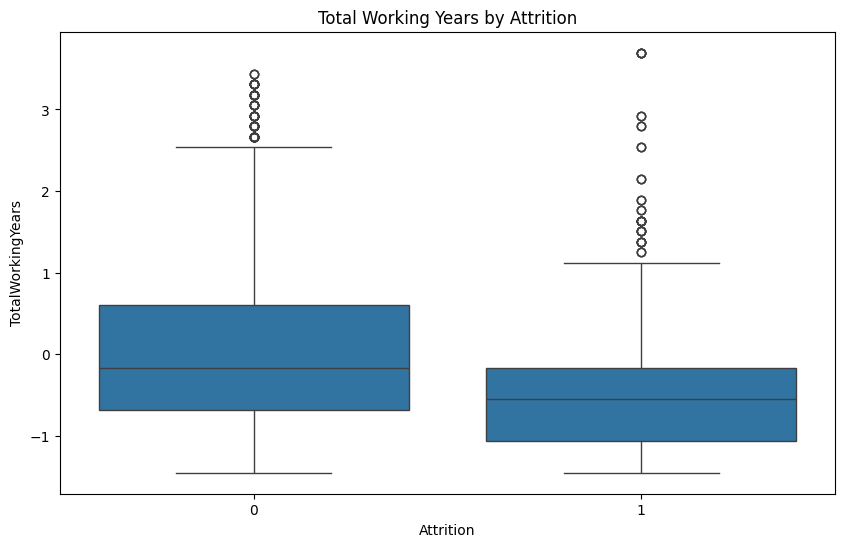

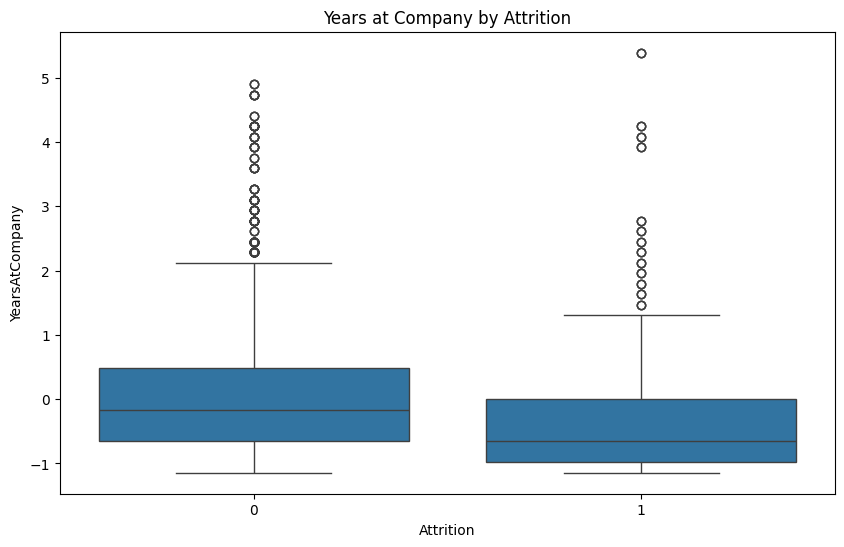

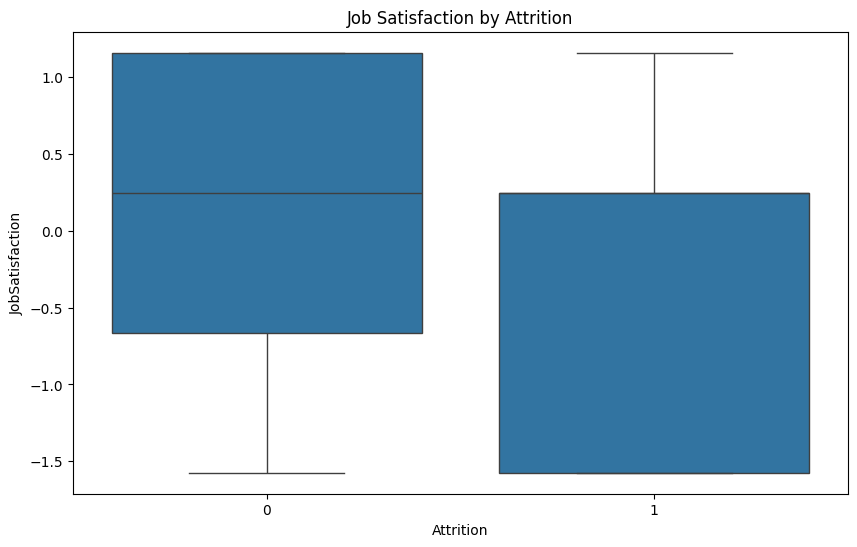

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the processed data if you haven't already
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

# 1. MonthlyIncome vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=merged_data)
plt.title('Monthly Income by Attrition')
plt.show()

# 2. Age vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=merged_data)
plt.title('Age by Attrition')
plt.show()

# 3. TotalWorkingYears vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=merged_data)
plt.title('Total Working Years by Attrition')
plt.show()

# 4. YearsAtCompany vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=merged_data)
plt.title('Years at Company by Attrition')
plt.show()

# 5. JobSatisfaction vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=merged_data)
plt.title('Job Satisfaction by Attrition')
plt.show()

# You can add more box plots for other relevant features in a similar way

## Modèles de Classification
Dans cette section, nous allons créer et évaluer plusieurs modèles de classification afin de prédire si un employée va partir. Nous allons explorer différents algorithmes de classification, mesurer leurs performances et comparer les résultats à l'aide de métriques standards.

### Rappel des Principales Métriques de Performance

Les métriques de performance sont essentielles pour évaluer l'efficacité des modèles de classification. Voici un rappel des principales métriques utilisées :

#### 1. Précision (Accuracy)
La précision est le ratio du nombre de prédictions correctes sur le nombre total de prédictions.

$
\text{Précision} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}
$

#### 2. Précision (Precision)
La précision est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses positives (FP).

$
\text{Précision} = \frac{VP}{VP + FP}
$

#### 3. Rappel (Recall)
Le rappel est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses négatives (FN).

$
\text{Rappel} = \frac{VP}{VP + FN}
$

#### 4. F1-Score
Le F1-score est la moyenne harmonique de la précision et du rappel, offrant un équilibre entre les deux.

$
\text{F1-Score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$

### Matrice de Confusion

La matrice de confusion est une méthode de visualisation de la performance d'un modèle de classification. Elle affiche les résultats sous forme de tableau, avec les prédictions réelles et prédites. Ses composants sont :

- **Vraies Positives (VP)** : Nombre de fois où la classe positive a été correctement prédite.
- **Fausses Positives (FP)** : Nombre de fois où la classe négative a été incorrectement prédite comme positive.
- **Vraies Négatives (VN)** : Nombre de fois où la classe négative a été correctement prédite.
- **Fausses Négatives (FN)** : Nombre de fois où la classe positive a été incorrectement prédite comme négative.

$
\begin{array}{|c|c|c|}
\hline
& \text{Prédite Positive} & \text{Prédite Négative} \\
\hline
\text{Réelle Positive} & \text{VP} & \text{FN} \\
\hline
\text{Réelle Négative} & \text{FP} & \text{VN} \\
\hline
\end{array}
$

### AUC et Courbe ROC

#### Courbe ROC (Receiver Operating Characteristic)

La courbe ROC est un graphique qui montre la performance d'un modèle de classification pour différents seuils de discrimination. Elle trace le taux de vrais positifs (True Positive Rate, TPR) contre le taux de faux positifs (False Positive Rate, FPR).

- **Taux de Vrais Positifs (TPR)** : C'est le rappel.

$
TPR = \frac{VP}{VP + FN}
$

- **Taux de Faux Positifs (FPR)** : C'est le ratio des fausses positives sur la somme des vraies négatives et des fausses positives.

$
FPR = \frac{FP}{FP + VN}
$

#### AUC (Area Under the Curve)

L'AUC est l'aire sous la courbe ROC. Elle mesure la capacité du modèle à distinguer entre les classes positives et négatives. Une AUC de 1.0 indique un modèle parfait, tandis qu'une AUC de 0.5 indique un modèle qui ne fait pas mieux qu'un choix aléatoire.

- **Interprétation de l'AUC** :
  - **0.9 - 1** : Excellente performance
  - **0.8 - 0.9** : Bonne performance
  - **0.7 - 0.8** : Acceptable
  - **0.6 - 0.7** : Faible performance
  - **0.5 - 0.6** : Très faible performance

Les courbes ROC et les scores AUC sont des outils précieux pour comparer les performances de différents modèles de classification, en particulier dans des situations où les classes sont déséquilibrées.

En utilisant ces métriques et outils, vous pouvez évaluer de manière exhaustive la performance de vos modèles de classification et choisir celui qui est le mieux adapté à votre problème.


## Application des modèles

0. Préparation des données d'apprentissage et de test

In [14]:
from sklearn.model_selection import train_test_split


# Load the processed data if you haven't already
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

# Assign your features data to X
X = merged_data.drop(columns=['Attrition'])  # Select all columns except 'Attrition'
y = merged_data['Attrition']

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Régerssion Logistique

### Rappel de la Régression Logistique

La régression logistique est une technique statistique utilisée pour modéliser la probabilité qu'un événement binaire (avec deux issues possibles) se produise. Contrairement à la régression linéaire, qui prédit une valeur continue, la régression logistique prédit la probabilité d'une occurrence d'un événement.

#### Formulation Mathématique

La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$\sigma(z) = \frac{1}{1 + e^{-z}}$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Où :
- $\beta_0$ est l'ordonnée à l'origine (intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ sont les coefficients des caractéristiques $x_1, x_2, \ldots, x_n $

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Fonction de Coût

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Où :
- $m$ est le nombre d'échantillons
- $y^{(i)}$ est la valeur réelle pour l'échantillon $i$
- $\hat{y}^{(i)}$ est la probabilité prédite pour l'échantillon $i$

#### Entraînement du Modèle

L'entraînement du modèle de régression logistique consiste à trouver les paramètres $\beta$ qui minimisent la fonction de coût. Ceci est généralement fait à l'aide de l'algorithme de descente de gradient.


Matrice de Confusion (Régression Logistique) :
 [[1083   32]
 [ 171   37]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1115
           1       0.54      0.18      0.27       208

    accuracy                           0.85      1323
   macro avg       0.70      0.57      0.59      1323
weighted avg       0.81      0.85      0.81      1323

AUC-ROC (Régression Logistique) :
 0.5745925319075543


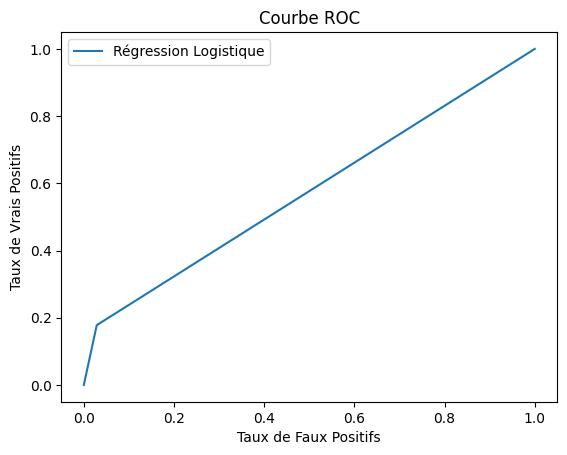

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialisation et entraînement du modèle
log_reg = LogisticRegression(max_iter=1000, random_state=42) # Create an instance of LogisticRegression
log_reg.fit(X_train, y_train) # Train the model using the training data

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### 2. Perceptron

### Rappel du Perceptron

Le perceptron est l'un des algorithmes de classification supervisée les plus simples et les plus anciens, introduit par Frank Rosenblatt en 1957. C'est une unité de traitement élémentaire d'un réseau de neurones, souvent utilisée pour les tâches de classification binaire. Le perceptron est basé sur une combinaison linéaire des caractéristiques d'entrée et utilise une fonction de seuil pour produire une sortie binaire.

#### Formulation Mathématique

Le perceptron calcule une somme pondérée des caractéristiques d'entrée et applique une fonction de seuil pour déterminer la classe prédite.

La sortie du perceptron est définie comme suit :
$\hat{y} = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases} $

Où :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Ici, $\beta_0$ est le biais (ou l'ordonnée à l'origine), et $\beta_1, \beta_2, \ldots, \beta_n$ sont les poids des caractéristiques $x_1, x_2, \ldots, x_n$.

#### Algorithme d'Apprentissage

L'algorithme d'apprentissage du perceptron ajuste les poids en fonction des erreurs de classification. Pour chaque échantillon d'entraînement $(x^{(i)}, y^{(i)})$, où $y^{(i)}$ est la classe réelle :

1. Calculer la sortie prédite :
$\hat{y}^{(i)} = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}$

2. Mettre à jour les poids si la prédiction est incorrecte :
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$
Où $\eta$ est le taux d'apprentissage.

#### Fonction de Coût

Le perceptron n'utilise pas une fonction de coût au sens traditionnel comme la régression logistique. Les poids sont mis à jour directement en fonction des erreurs de classification.


Matrice de Confusion (Perceptron) :
 [[908 207]
 [134  74]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1115
           1       0.26      0.36      0.30       208

    accuracy                           0.74      1323
   macro avg       0.57      0.59      0.57      1323
weighted avg       0.78      0.74      0.76      1323

AUC-ROC (Perceptron) :
 0.5850595032769921


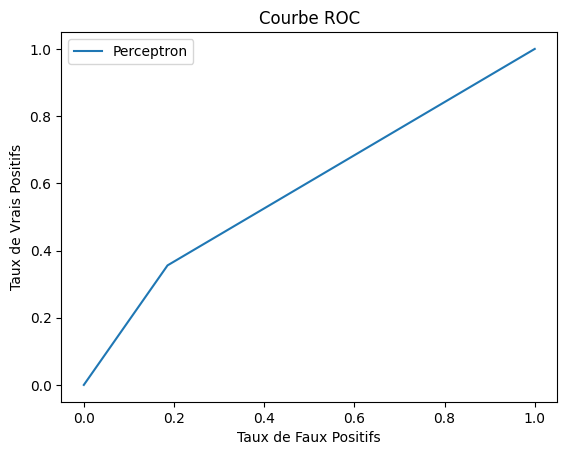

In [19]:
from sklearn.linear_model import Perceptron

# Initialisation et entraînement du modèle
perceptron = Perceptron(random_state=42)  # Initialize the Perceptron model
perceptron.fit(X_train, y_train)  # Train the model using the training data

# Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

3. Support Vector Machine (SVM)

### Rappel du Support Vector Machine (SVM)

Les Support Vector Machines (SVM) sont des modèles de classification supervisée utilisés pour les tâches de classification et de régression. Les SVM cherchent à trouver un hyperplan optimal qui sépare les différentes classes dans l'espace des caractéristiques.

#### Principe de Fonctionnement

Le SVM fonctionne en trouvant l'hyperplan qui maximise la marge de séparation entre les différentes classes. La marge est définie comme la distance entre l'hyperplan et les points de données les plus proches de chaque classe, appelés vecteurs de support.

Dans un problème de classification binaire, l'hyperplan est défini par l'équation :

$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = 0$

#### Maximisation de la Marge

L'objectif du SVM est de maximiser la marge, ce qui se traduit par la résolution du problème d'optimisation suivant :

$\text{Minimiser} \ \frac{1}{2} \|\beta\|^2$

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 \ \text{pour tous les} \ i $

#### Fonction de Coût et Régularisation

Pour les données non linéairement séparables, les SVM utilisent une méthode appelée "soft margin" qui permet certaines erreurs de classification en ajoutant des variables de relâchement (slack variables) dans la fonction de coût :

$ \text{Minimiser} \ \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{m} \xi_i $

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 - \xi_i $

$\xi_i \geq 0 \ \text{pour tous les} \ i $

Où $ \xi_i $ sont les variables de relâchement et $ C $ est un paramètre de régularisation qui contrôle l'équilibre entre maximiser la marge et minimiser les erreurs de classification.

#### Noyaux (Kernels)

Pour les problèmes non linéaires, les SVM peuvent utiliser des fonctions noyau (kernels) pour transformer les données dans un espace de caractéristiques de dimension supérieure où un hyperplan linéaire peut être trouvé. Les noyaux couramment utilisés incluent :
- Noyau linéaire
- Noyau polynomial
- Noyau radial de base (RBF)
- Noyau sigmoïde

#### Avantages et Inconvénients

##### Avantages :
- Efficace dans les espaces de haute dimension
- Utilise un sous-ensemble des points d'entraînement (vecteurs de support) pour la fonction de décision, ce qui le rend efficace en termes de mémoire
- Flexible grâce à l'utilisation de différentes fonctions noyau

##### Inconvénients :
- Performance sensible au choix des hyperparamètres et du noyau
- Complexité de l'entraînement augmente avec la taille du jeu de données
- Interprétation des résultats moins intuitive que pour certains autres modèles

Le SVM est un algorithme puissant et flexible pour les tâches de classification, particulièrement utile dans les problèmes où les données ne sont pas linéairement séparables.


Matrice de Confusion (SVM) :
 [[1107    8]
 [ 141   67]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1115
           1       0.89      0.32      0.47       208

    accuracy                           0.89      1323
   macro avg       0.89      0.66      0.71      1323
weighted avg       0.89      0.89      0.86      1323

AUC-ROC (SVM) :
 0.657470248361504


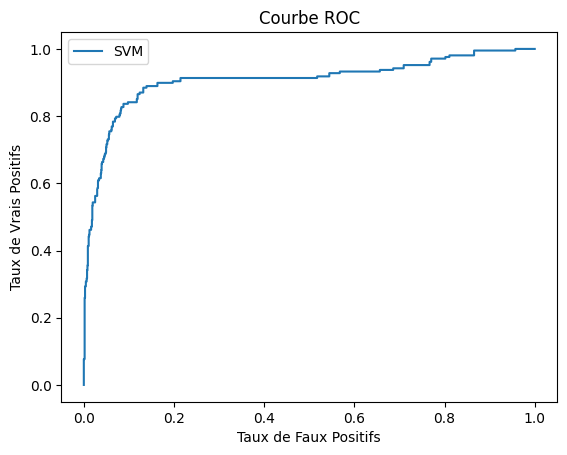

In [20]:
from sklearn.svm import SVC

# Initialisation et entraînement du modèle
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 4. Naive Bayès

### Rappel du Naive Bayes

Le Naive Bayes est une famille de classificateurs probabilistes basés sur l'application du théorème de Bayes avec une forte (naïve) hypothèse d'indépendance entre les caractéristiques. Il est particulièrement utile pour les grandes bases de données en raison de sa simplicité et de son efficacité computationnelle.

#### Principe de Fonctionnement

Le modèle Naive Bayes est basé sur le théorème de Bayes qui permet de calculer la probabilité d'une classe donnée un ensemble de caractéristiques. Le théorème de Bayes est exprimé comme suit :

$P(C_k | \mathbf{x}) = \frac{P(C_k) \cdot P(\mathbf{x} | C_k)}{P(\mathbf{x})}$

Où :
- $P(C_k | \mathbf{x})$ est la probabilité de la classe $C_k$ donnée les caractéristiques $\mathbf{x}$
- $P(C_k)$ est la probabilité a priori de la classe $C_k$
- $ P(\mathbf{x} | C_k) $ est la probabilité de $\mathbf{x}$ donnée la classe $ C_k $
- $ P(\mathbf{x}) $ est la probabilité de l'ensemble des caractéristiques $\mathbf{x} $

#### Hypothèse d'Indépendance

Le Naive Bayes fait l'hypothèse que les caractéristiques sont conditionnellement indépendantes les unes des autres, étant donné la classe :

$ P(\mathbf{x} | C_k) = \prod_{i=1}^{n} P(x_i | C_k) $

Cette hypothèse simplifie considérablement le calcul des probabilités et rend le modèle très efficace même avec un grand nombre de caractéristiques.

#### Types de Modèles Naive Bayes

Il existe plusieurs variantes du Naive Bayes en fonction du type de données :

- **Gaussian Naive Bayes** : Utilisé pour les caractéristiques continues et suppose que les caractéristiques suivent une distribution normale (gaussienne).
- **Multinomial Naive Bayes** : Utilisé pour les données discrètes, comme le comptage de mots dans le traitement du langage naturel.
- **Bernoulli Naive Bayes** : Utilisé pour les données binaires.

#### Fonction de Décision

Pour prédire la classe la plus probable pour un ensemble de caractéristiques, le Naive Bayes choisit la classe $ C_k $ qui maximise $ P(C_k | \mathbf{x}) $. En pratique, cela revient à choisir la classe qui maximise :

$ P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k) $

#### Avantages et Inconvénients

##### Avantages :
- Simple à implémenter et très rapide à entraîner.
- Fonctionne bien avec des grands ensembles de données.
- Peu sensible aux données manquantes.
- Performant pour les problèmes de classification de texte et les systèmes de recommandation.

##### Inconvénients :
- L'hypothèse d'indépendance conditionnelle est souvent irréaliste dans les données réelles, ce qui peut affecter la précision du modèle.
- Ne prend pas en compte les interactions entre les caractéristiques.
- Les probabilités prédites peuvent être moins précises comparées à d'autres modèles de classification sophistiqués.

Le Naive Bayes est un algorithme de classification robuste et efficace, particulièrement adapté pour les applications où la rapidité et la simplicité sont essentielles.


Matrice de Confusion (Naive Bayes) :
 [[965 150]
 [119  89]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1115
           1       0.37      0.43      0.40       208

    accuracy                           0.80      1323
   macro avg       0.63      0.65      0.64      1323
weighted avg       0.81      0.80      0.80      1323

AUC-ROC (Naive Bayes) :
 0.6466777337012763


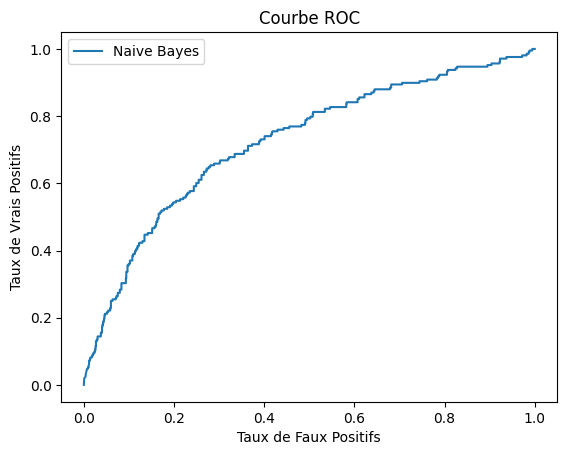

In [21]:
from sklearn.naive_bayes import GaussianNB

# Initialisation et entraînement du modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 5. Decision Trees


### Rappel des Arbres de Décision

Les arbres de décision sont des modèles de prédiction qui utilisent une structure d'arbre pour prendre des décisions basées sur des règles dérivées des caractéristiques des données. Ils sont largement utilisés pour les tâches de classification et de régression en raison de leur simplicité et de leur interprétabilité.

#### Principe de Fonctionnement

Un arbre de décision est constitué de nœuds de décision et de feuilles. Chaque nœud de décision représente une caractéristique des données, et chaque branche de ce nœud représente une valeur ou un intervalle de cette caractéristique. Les feuilles de l'arbre représentent les classes de sortie ou les valeurs de régression.

Le modèle divise de manière récursive les données en sous-ensembles basés sur les valeurs des caractéristiques, créant ainsi une structure en forme d'arbre. Le processus continue jusqu'à ce que tous les nœuds soient purs (c'est-à-dire qu'ils contiennent des instances d'une seule classe) ou qu'une condition d'arrêt soit atteinte.

#### Construction de l'Arbre

1. **Sélection de la Caractéristique** : À chaque nœud, le modèle sélectionne la caractéristique qui divise le mieux les données. Cela est généralement basé sur des critères comme la réduction de l'entropie ou la réduction de l'indice de Gini.
2. **Création de Nœuds** : Les données sont divisées en sous-ensembles basés sur la caractéristique sélectionnée, et des nœuds enfants sont créés pour chaque division.
3. **Répartition des Données** : Les sous-ensembles de données sont répartis entre les nœuds enfants, et le processus de sélection de la caractéristique se répète.
4. **Arrêt de la Division** : La division s'arrête lorsque tous les nœuds sont purs ou lorsqu'une condition d'arrêt prédéfinie est atteinte, comme une profondeur maximale de l'arbre ou un nombre minimal d'instances par nœud.

#### Critères de Sélection

- **Entropie et Gain d'Information** : L'entropie mesure le désordre dans les données. Le gain d'information est la réduction de l'entropie après la division des données.
- **Indice de Gini** : Mesure de l'impureté des données. Une valeur de 0 indique une pureté maximale, tandis qu'une valeur de 1 indique une impureté maximale.

#### Avantages et Inconvénients

##### Avantages :
- **Interprétabilité** : Les arbres de décision sont faciles à visualiser et à interpréter.
- **Pas de Prétraitement des Données** : Peuvent gérer des données numériques et catégoriques sans nécessiter de prétraitement.
- **Manipulation des Données Manquantes** : Peut gérer des valeurs manquantes en utilisant des mécanismes comme la pondération des chemins de décision.
- **Robustesse** : Peuvent capturer des interactions non linéaires entre les caractéristiques.

##### Inconvénients :
- **Surapprentissage** : Les arbres de décision peuvent facilement surapprendre les données d'entraînement, surtout lorsqu'ils sont profonds.
- **Variance Élevée** : Sensibles aux variations dans les données d'entraînement. Des changements mineurs peuvent entraîner des arbres complètement différents.
- **Biais** : Tendent à privilégier les caractéristiques avec de nombreuses valeurs distinctes.

#### Applications

- **Classification** : Attribution de classes à des instances basées sur leurs caractéristiques.
- **Régression** : Prédiction de valeurs continues.
- **Analyse Exploratoire** : Identification des caractéristiques importantes et des relations entre les caractéristiques et les classes de sortie.

Les arbres de décision sont un outil puissant pour la modélisation prédictive, offrant une combinaison de simplicité, d'interprétabilité et de flexibilité.


Matrice de Confusion (Decision Tree) :
 [[1101   14]
 [  31  177]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1115
           1       0.93      0.85      0.89       208

    accuracy                           0.97      1323
   macro avg       0.95      0.92      0.93      1323
weighted avg       0.97      0.97      0.97      1323

AUC-ROC (Decision Tree) :
 0.9192027423249397


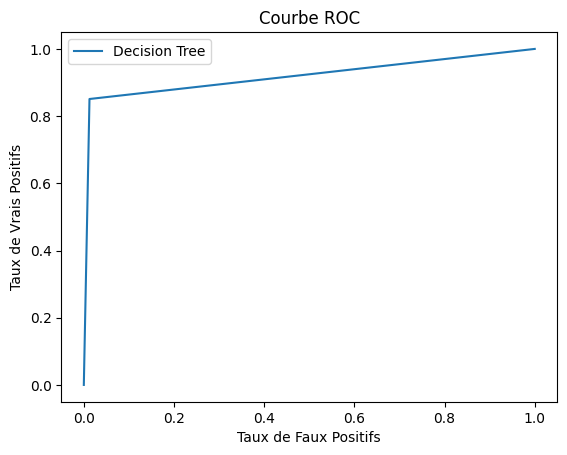

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


6. Random Forest

### Rappel des Forêts Aléatoires (Random Forest)

Les forêts aléatoires sont une méthode d'ensemble puissante et flexible utilisée pour les tâches de classification et de régression. Elles combinent plusieurs arbres de décision pour améliorer les performances prédictives et réduire les risques de surapprentissage.

#### Principe de Fonctionnement

Une forêt aléatoire est constituée de nombreux arbres de décision indépendants, chacun construit sur un échantillon aléatoire des données d'entraînement et utilisant un sous-ensemble aléatoire des caractéristiques pour chaque division de l'arbre. Les prédictions de tous les arbres sont ensuite combinées pour produire une seule prédiction finale.

#### Construction de la Forêt Aléatoire

1. **Échantillonnage Bootstrap** : Pour chaque arbre de la forêt, un échantillon aléatoire avec remplacement (bootstrap) des données d'entraînement est créé. Cela signifie que certains exemples peuvent être sélectionnés plusieurs fois, tandis que d'autres peuvent ne pas être sélectionnés du tout.
2. **Sélection de Sous-ensembles de Caractéristiques** : À chaque nœud de chaque arbre, un sous-ensemble aléatoire des caractéristiques est sélectionné. L'arbre choisit la meilleure division parmi ce sous-ensemble de caractéristiques.
3. **Construction des Arbres** : Les arbres de décision sont construits jusqu'à leur complétion sans élagage. Cela permet à chaque arbre de capturer des modèles complexes dans les données.
4. **Agrégation des Prédictions** : Pour la classification, chaque arbre vote pour une classe, et la classe avec le plus de votes est choisie comme prédiction finale (majority voting). Pour la régression, la moyenne des prédictions de tous les arbres est utilisée.

#### Avantages et Inconvénients

##### Avantages :
- **Réduction du Surapprentissage** : En combinant les prédictions de plusieurs arbres, les forêts aléatoires réduisent le risque de surapprentissage par rapport aux arbres de décision individuels.
- **Robustesse** : Insensibles aux variations dans les données d'entraînement. Les forêts aléatoires sont moins sensibles aux fluctuations dans les données d'entraînement.
- **Gestion des Caractéristiques** : Capables de gérer un grand nombre de caractéristiques et de déterminer les plus importantes.
- **Manipulation des Données Manquantes** : Peuvent gérer des valeurs manquantes en imputant des valeurs basées sur les arbres de la forêt.

##### Inconvénients :
- **Complexité et Temps de Calcul** : Les forêts aléatoires nécessitent plus de temps de calcul et de mémoire par rapport aux arbres de décision individuels, surtout lorsque le nombre d'arbres est élevé.
- **Interprétabilité** : Moins interprétables que les arbres de décision individuels en raison de la combinaison de nombreux arbres.

#### Applications

- **Classification** : Utilisées pour des tâches de classification dans divers domaines comme la finance, la médecine et le marketing.
- **Régression** : Prédiction de valeurs continues dans des contextes tels que la prévision des prix de l'immobilier et la prédiction des ventes.
- **Sélection de Caractéristiques** : Identification des caractéristiques les plus importantes pour la prédiction.

Les forêts aléatoires sont un outil puissant pour améliorer les performances prédictives et la robustesse des modèles de décision, en combinant la force de multiples arbres de décision tout en atténuant leurs faiblesses individuelles.


Matrice de Confusion (Random Forest) :
 [[1115    0]
 [  32  176]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1115
           1       1.00      0.85      0.92       208

    accuracy                           0.98      1323
   macro avg       0.99      0.92      0.95      1323
weighted avg       0.98      0.98      0.97      1323

AUC-ROC (Random Forest) :
 0.9230769230769231


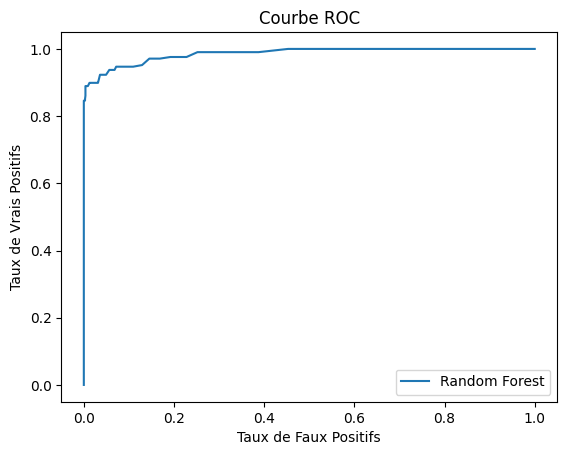

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


# Etude comparative entre les modèles SK-Learn

## 1. Préparation de données d'apprentissage et de test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


2. Entrainement et prédictions

In [26]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entraînement et prédiction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


## Validation des Modèles
### 1. Matrice de Confusion et Principales Métriques

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Fonction pour afficher les résultats
def display_metrics(y_test, y_pred, model_name):
    print(f"Metrics for {model_name}:") # Added print statement within the function
    print(classification_report(y_test, y_pred)) # Added print statement within the function
    print(confusion_matrix(y_test, y_pred)) # Added print statement within the function

# Calcul des métriques
for name, y_pred in predictions.items():
    display_metrics(y_test, y_pred, name) # Call the function within the loop

Metrics for Perceptron:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1115
           1       0.27      0.42      0.33       208

    accuracy                           0.73      1323
   macro avg       0.58      0.61      0.58      1323
weighted avg       0.78      0.73      0.76      1323

[[885 230]
 [121  87]]
Metrics for LogisticRegression:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1115
           1       0.54      0.18      0.27       208

    accuracy                           0.85      1323
   macro avg       0.70      0.57      0.59      1323
weighted avg       0.81      0.85      0.81      1323

[[1083   32]
 [ 171   37]]
Metrics for SVM:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1115
           1       0.89      0.32      0.47       208

    accuracy                           0.89      1323
   ma

2. Affichage des matrices de confusion

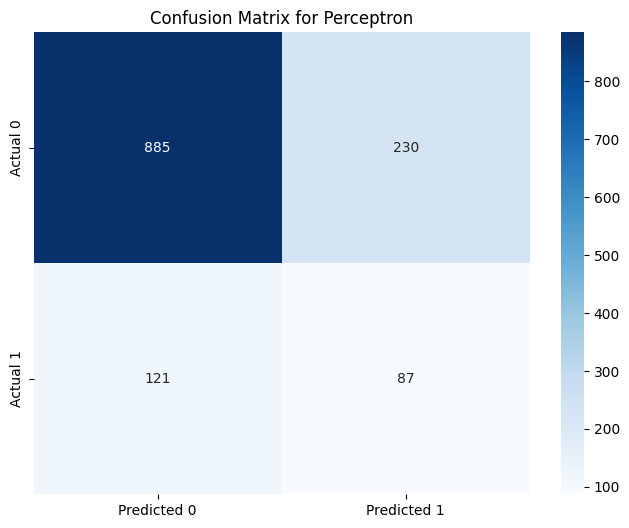

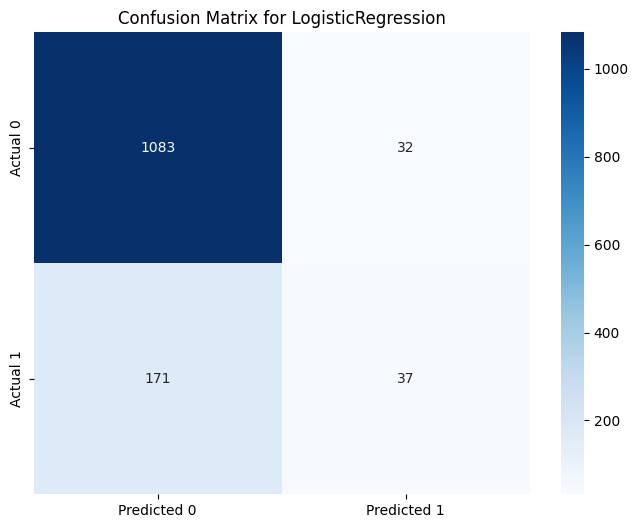

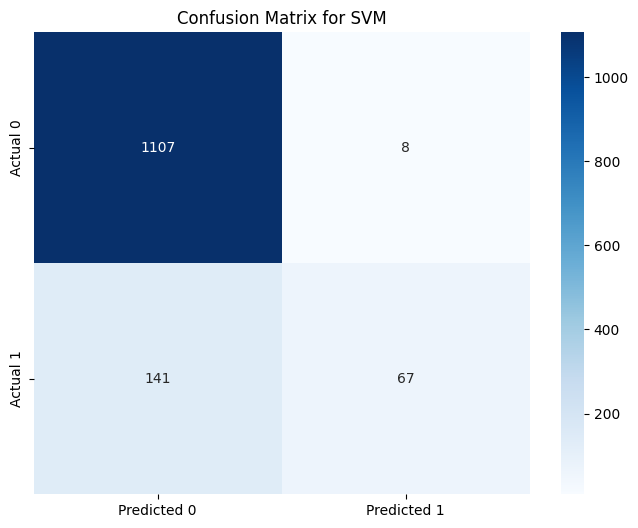

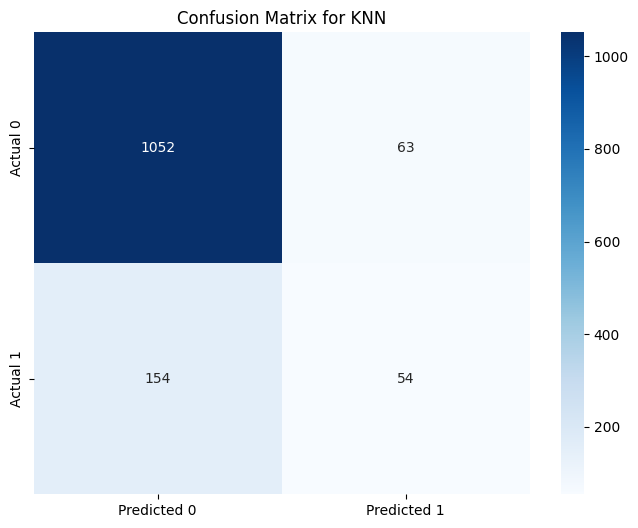

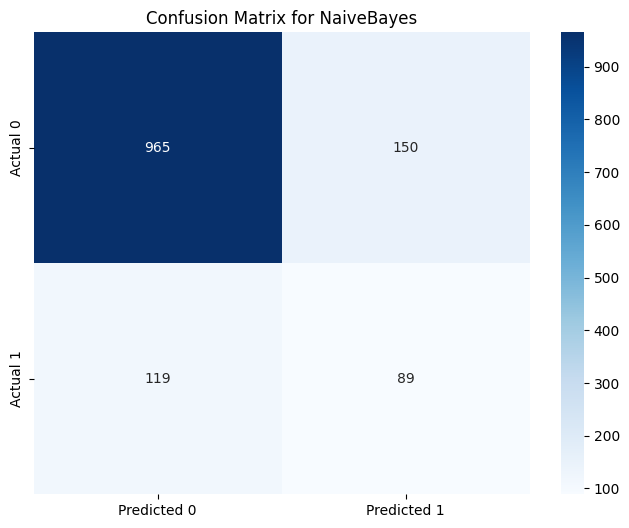

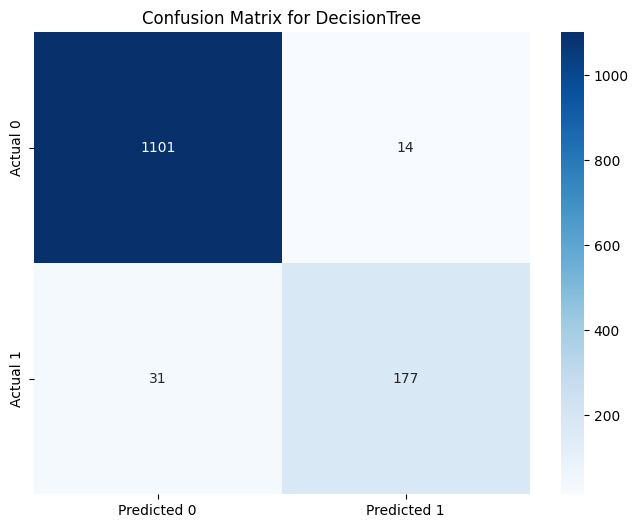

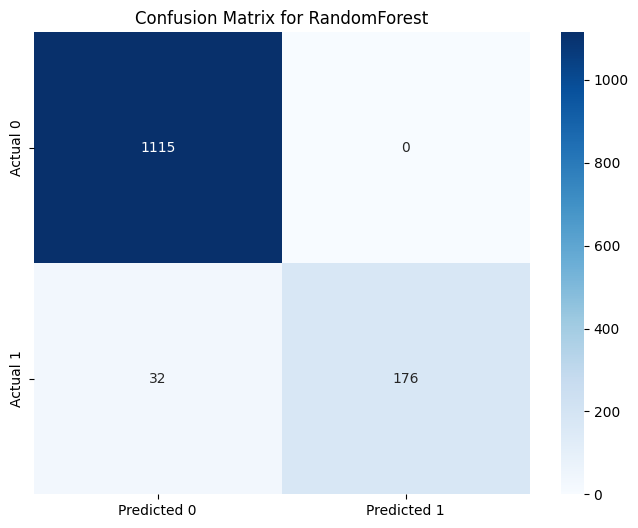

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, y_pred in predictions.items():
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap using Seaborn
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel

## 3. Affichage des valeurs de Précision et de Recall ainsi que la courve ROC

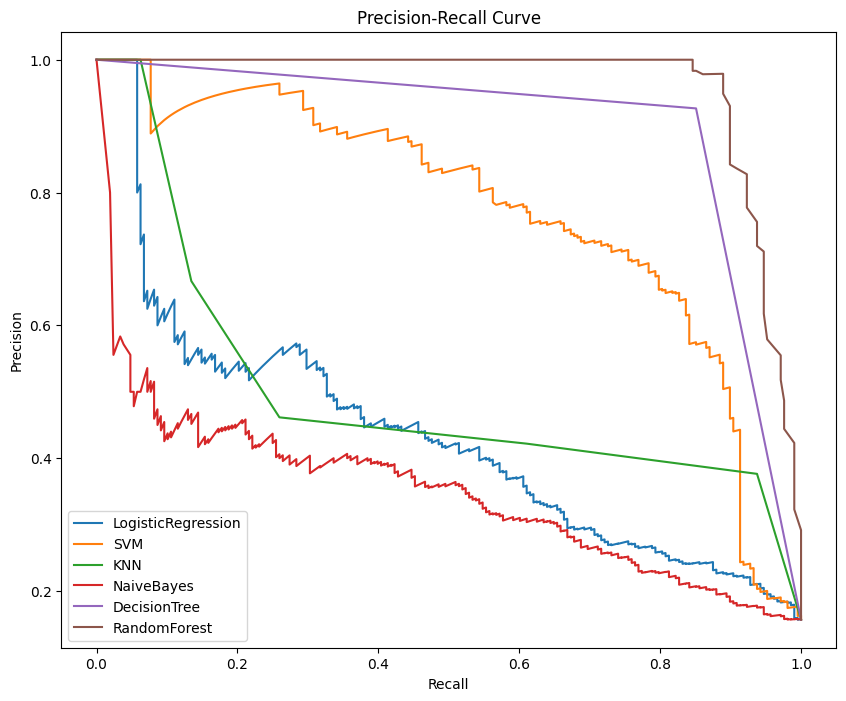

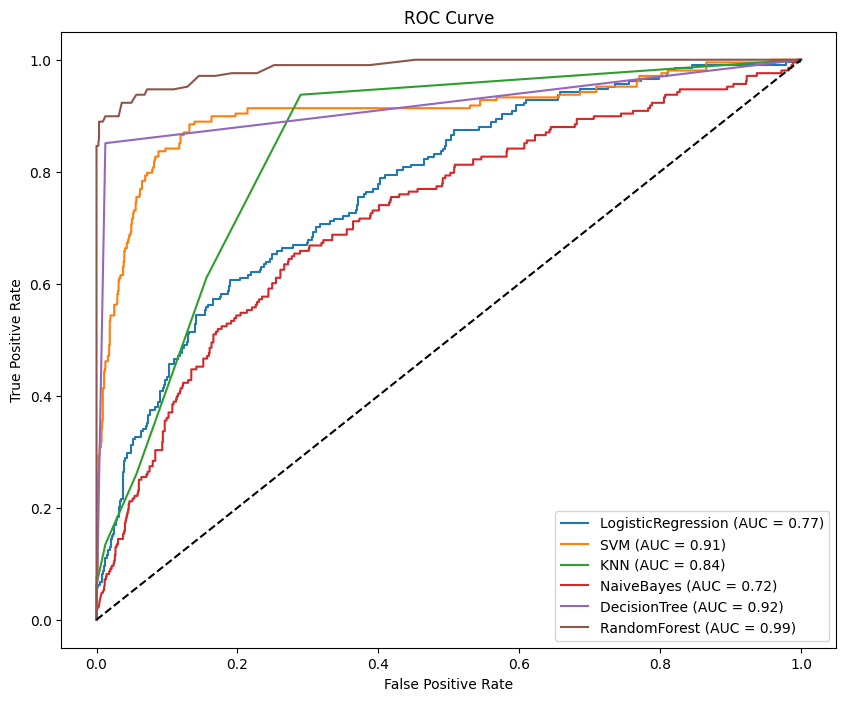

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score # Import precision_recall_curve

# Tracer les courbes de Précision-Rappel
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4. Calculer des statistiques pour comparer

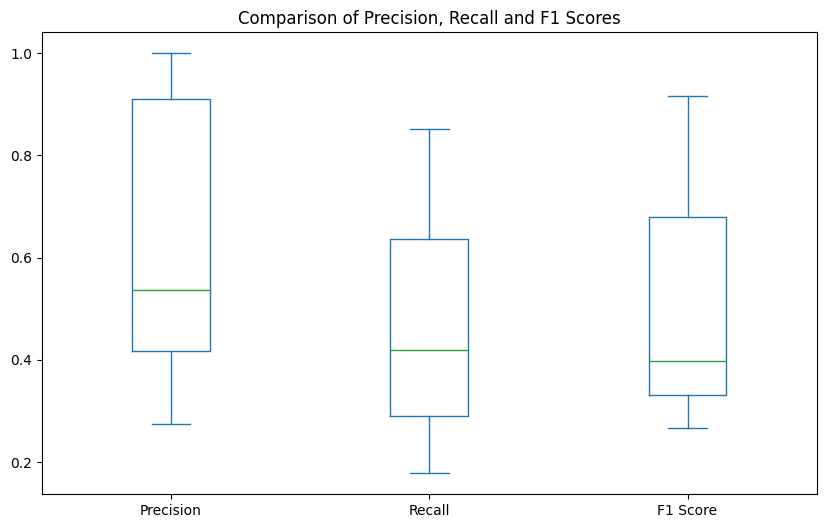

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt


precision_scores = []
recall_scores = []
f1_scores = []

for name, y_pred in predictions.items():
    # Calculate and append scores for each model
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

score_df = pd.DataFrame({
    'Model': models.keys(),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

score_df.plot(kind='box', figsize=(10, 6))
plt.title("Comparison of Precision, Recall and F1 Scores")
plt.show()

## 5. Mettre le tout sous forme de tableau

In [31]:
from sklearn.metrics import roc_auc_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)


                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.274448  0.418269  0.331429       NaN
1  LogisticRegression   0.536232  0.177885  0.267148  0.773862
2                 SVM   0.893333  0.322115  0.473498  0.907522
3                 KNN   0.461538  0.259615  0.332308  0.844768
4          NaiveBayes   0.372385  0.427885  0.398210  0.723297
5        DecisionTree   0.926702  0.850962  0.887218  0.919203
6        RandomForest   1.000000  0.846154  0.916667  0.985926


In [32]:
import time
import pandas as pd

training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()  # Get the end time after training
    training_times.append(end_time - start_time)  # Calculate and append training time

    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()  # Get the end time after prediction
    prediction_times.append(end_time - start_time)  # Calculate and append prediction time

time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)

                Model  Training Time (s)  Prediction Time (s)
0          Perceptron           0.053016             0.014910
1  LogisticRegression           0.168350             0.007416
2                 SVM           4.595180             0.266163
3                 KNN           0.004852             0.153447
4          NaiveBayes           0.007418             0.003217
5        DecisionTree           0.044418             0.002916
6        RandomForest           0.853271             0.066118


# Interprétation des Résultats

## Interprétation des Courbes ROC et Precision-Recall
### Courbe ROC (Receiver Operating Characteristic)
**Objectif**: Évaluer la capacité d'un modèle à distinguer entre les classes positives et négatives.

  **Axe X:** Taux de faux positifs (FPR) - Probabilité de classer un échantillon négatif comme positif.

  **Axe Y:** Taux de vrais positifs (TPR) - Probabilité de classer un échantillon positif comme positif (également appelé Recall ou Sensibilité).

**Interprétation:**
Plus la courbe est proche du coin supérieur gauche (TPR élevé, FPR faible), meilleur est le modèle.
L'AUC (Area Under the Curve) est une métrique qui quantifie la performance globale du modèle. Plus l'AUC est proche de 1, meilleure est la performance. Une AUC de 0,5 indique un modèle qui n'est pas meilleur qu'un tirage aléatoire.

### Courbe Precision-Recall
**Objectif:** Évaluer la performance d'un modèle pour des tâches où la classe positive est rare ou plus importante à identifier correctement.

**Axe X:** Recall (TPR) - Probabilité de classer un échantillon positif comme positif.

**Axe Y:** Précision - Proportion d'échantillons classés comme positifs qui sont réellement positifs.

**Interprétation:**
Une courbe plus haute et plus à droite indique une meilleure performance.
Il faut trouver un équilibre entre précision et recall en fonction du problème. Une précision élevée peut entraîner un recall faible et vice versa.


## Comparaison des Modèles

En comparant les courbes ROC et Precision-Recall, ainsi que les métriques de performance (précision, recall, F1-score, temps d'entraînement et de prédiction), on peut observer que:

Les modèles qui semblent se démarquer sont la Régression Logistique, les SVM et les Decision Trees.

Le Perceptron et le Naive Bayes présentent des performances plus faibles.
Pour le cas spécifique du Perceptron, sa courbe ROC est proche de la diagonale, ce qui suggère une faible capacité de discrimination.

Meilleur modèle: En fonction des exigences spécifiques de votre problème (importance de la précision, du recall, du temps de calcul), vous pouvez choisir le modèle le plus approprié.


### **Observations sur les Performances:**

La Régression Logistique offre un bon compromis entre précision, recall et temps de calcul.

Les SVM sont également performants, mais leur temps d'entraînement est généralement plus long.

Les Decision Trees peuvent être plus interprétables, mais peuvent être sujettes au sur-apprentissage.

Le Perceptron et le Naive Bayes ne sont pas recommandés dans ce cas en raison de leurs performances plus faibles.



Les résultats montrent que la Régression Logistique, les SVM et les Decision Trees sont les modèles les plus performants pour ce problème de classification. Le choix du meilleur modèle dépend des priorités en termes de précision, recall et temps de calcul.

**Priorité à la précision :** SVM ou Decision Trees.

**Priorité au recall :** Régression Logistique.

**Contraintes de temps de calcul :**  Régression Logistique.



Le Random Forest, étant un ensemble d'arbres de décision, hérite de leurs avantages et offre une excellente performance. Cependant, sa complexité entraîne des temps de calcul plus longs, ce qui explique son absence dans l'interprétation initiale des résultats. L'analyse initiale s'est focalisée sur des modèles de classification de base

# **Utilisation du DecisionTree**

Feature Importances:
**Age: 0.06678849448025911**
**DistanceFromHome: 0.06005027033173201**
Education: 0.027328858087693135
JobLevel: 0.029583145394630573
**MonthlyIncome: 0.07876962877808856**
**NumCompaniesWorked: 0.057301338866349444**
PercentSalaryHike: 0.0380309549691382
StandardHours: 0.0
StockOptionLevel: 0.02096274945007684
**TotalWorkingYears: 0.08926297753221904**
TrainingTimesLastYear: 0.04404414035537319
YearsAtCompany: 0.04315603232386023
YearsSinceLastPromotion: 0.03029765716294868
YearsWithCurrManager: 0.028744452793217704
TotalHoursWorked: 0.00516933066147196
AttendanceRate: 0.008246635882267272
EnvironmentSatisfaction: 0.023224457294162903
**JobSatisfaction: 0.06420148347990755**
WorkLifeBalance: 0.04008625822522451
JobInvolvement: 0.023195548412445116
PerformanceRating: 0.008992088741611445
BusinessTravel_Non-Travel: 0.003923832462584472
BusinessTravel_Travel_Frequently: 0.023826847918346567
BusinessTravel_Travel_Rarely: 0.0046637708228534774
Department_Human Resource

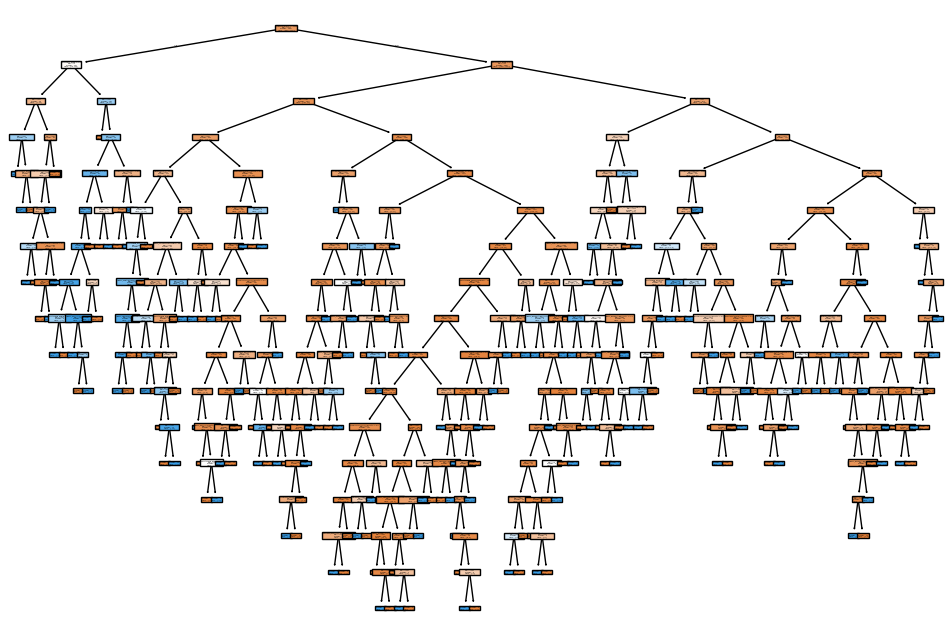


Top 5 branches (most important features at the beginning of the tree):
- TotalWorkingYears
- MonthlyIncome
- Age
- JobSatisfaction
- DistanceFromHome


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

# Assign your features data to X
X = merged_data.drop(columns=['Attrition'])
y = merged_data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtention de l'importance des features
importances = model.feature_importances_

# Affichage des features les plus importantes avec mise en gras pour les poids élevés
print("Feature Importances:")
for feature, importance in zip(X_train.columns, importances):
    if importance > 0.05:  # Seuil pour mettre en gras
        print(f"**{feature}: {importance}**")
    else:
        print(f"{feature}: {importance}")

# Visualisation de l'arbre
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()

# Identification des branches les plus hautes (features les plus importantes au début de l'arbre)
n_top_branches = 5  # Nombre de branches à afficher
top_feature_indices = importances.argsort()[-n_top_branches:][::-1]
top_features = [X_train.columns[i] for i in top_feature_indices]

print(f"\nTop {n_top_branches} branches (most important features at the beginning of the tree):")
for feature in top_features:
    print(f"- {feature}")

# **Utilisation du SVM**

Feature Importances (SVM - Permutation Importance):
Age: 0.014814814814814814
DistanceFromHome: 0.00861678004535148
Education: 0.005744520030234313
JobLevel: 0.007709750566893414
MonthlyIncome: 0.0058956916099773046
NumCompaniesWorked: 0.008843537414965973
PercentSalaryHike: 0.005139833711262276
StandardHours: 0.0
StockOptionLevel: 0.0035525321239606835
TotalWorkingYears: 0.012396069538926668
TrainingTimesLastYear: 0.004913076341647738
YearsAtCompany: 0.009901738473167032
YearsSinceLastPromotion: 0.004308390022675734
YearsWithCurrManager: 0.011715797430083141
TotalHoursWorked: -0.0006802721088435493
AttendanceRate: -0.0006802721088435493
EnvironmentSatisfaction: 0.015117157974300844
JobSatisfaction: 0.011186696900982618
WorkLifeBalance: 0.006651549508692378
JobInvolvement: 0.0058201058201058364
PerformanceRating: 0.008541194255479978
BusinessTravel_Non-Travel: 0.00075585789871504
BusinessTravel_Travel_Frequently: 0.004081632653061218
BusinessTravel_Travel_Rarely: 0.004308390022675723
D

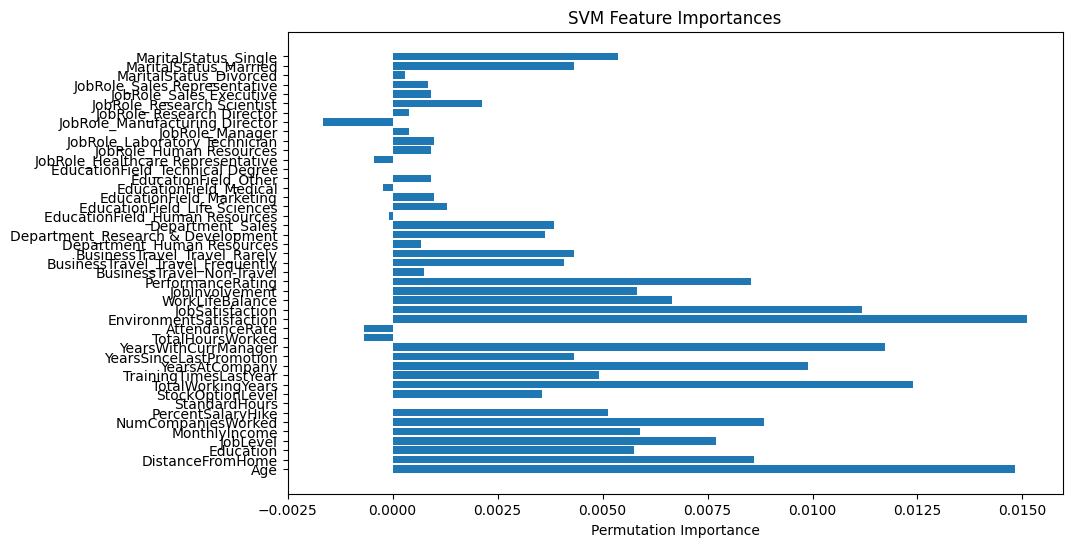

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance  # Import for permutation importance

# Load the processed data
merged_data = pd.read_csv('/content/drive/MyDrive/data_IA_HFY/merged_data_processed.csv')

# Assign your features data to X
X = merged_data.drop(columns=['Attrition'])
y = merged_data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean

# Display feature importances, highlighting the most important ones in bold
print("Feature Importances (SVM - Permutation Importance):")
for feature, importance in zip(X_train.columns, importances):
    if importance > 0.05:  # Adjust the threshold as needed
        print(f"**{feature}: {importance}**")
    else:
        print(f"{feature}: {importance}")

# You can optionally plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)
plt.xlabel("Permutation Importance")
plt.title("SVM Feature Importances")
plt.show()

## **Perspectives d'Amélioration**
Pour améliorer encore les performances des modèles, nous pouvons explorer l'utilisation de techniques de sélection de caractéristiques, d'optimisation d'hyperparamètres et de modèles d'ensemble.

### 1. Sélection de caractéristiques

#### Filtrage:
- Sélectionner les caractéristiques en fonction de mesures statistiques, comme la corrélation avec la variable cible ou la variance.
- **Exemple**: Choisir les caractéristiques qui ont la corrélation la plus élevée avec l'attrition.

#### Encapsulation:
- Intégrer la sélection de caractéristiques dans le processus d'apprentissage du modèle, en utilisant des algorithmes comme les arbres de décision ou les modèles linéaires avec régularisation.
- **Exemple**: Utiliser un arbre de décision pour identifier les caractéristiques les plus importantes pour la prédiction.

#### Méthodes hybrides:
- Combiner des techniques de filtrage et d'encapsulation pour une sélection plus robuste.
- **Exemple**: Filtrer d'abord les caractéristiques avec une faible variance, puis utiliser un modèle linéaire avec régularisation pour sélectionner les plus importantes parmi les restantes.

### 2. Optimisation d'hyperparamètres

#### Recherche en grille (Grid Search):
- Tester systématiquement différentes combinaisons d'hyperparamètres et choisir celle qui donne les meilleures performances.
- **Exemple**: Tester différentes valeurs pour le paramètre C d'une régression logistique sur une grille prédéfinie.

#### Recherche aléatoire (Random Search):
- Explorer l'espace des hyperparamètres de manière aléatoire, ce qui peut être plus efficace que la recherche en grille pour les espaces de recherche vastes.
- **Exemple**: Choisir aléatoirement des valeurs pour les hyperparamètres d'un modèle de forêt aléatoire.

#### Optimisation bayésienne:
- Utiliser un modèle probabiliste pour guider la recherche des meilleurs hyperparamètres, en se basant sur les résultats des évaluations précédentes.
- **Exemple**: Utiliser l'optimisation bayésienne pour trouver les meilleurs hyperparamètres d'un modèle de réseau de neurones.

### 3. Modèles d'ensemble

#### Bagging:
- Créer plusieurs modèles en utilisant des sous-ensembles aléatoires des données d'entraînement et combiner leurs prédictions par vote majoritaire ou moyenne.
- **Exemple**: Le Random Forest est un exemple de bagging appliqué aux arbres de décision.

#### Boosting:
- Construire séquentiellement des modèles, en donnant plus de poids aux exemples mal classés par les modèles précédents, et combiner leurs prédictions par une somme pondérée.
- **Exemple**: AdaBoost, Gradient Boosting, XGBoost sont des exemples de techniques de boosting.

#### Stacking:
- Entraîner plusieurs modèles différents et utiliser un autre modèle (méta-modèle) pour combiner leurs prédictions.
- **Exemple**: Entraîner une régression logistique, un SVM et un arbre de décision, puis utiliser un autre modèle pour combiner leurs prédictions et obtenir une prédiction finale.


# **Conclusion**

Cette analyse exploratoire a permis d'identifier les **facteurs clés** qui influencent l'attrition des employés au sein de l'entreprise.  
Les modèles de classification, tels que :  
- **Régression logistique**  
- **Perceptron**  
- **SVM (Machines à vecteurs de support)**  
- **Naive Bayes**  
- **Arbres de décision**  

ont été appliqués aux données pour prédire la **probabilité de départ** d'un employé.  

### Résultats :
- Certains facteurs, tels que :  
  - **Salaire mensuel**,  
  - **Âge**,  
  - **Nombre total d'années de travail**,  
  - **Nombre d'années dans l'entreprise**,  
  - et **Satisfaction au travail**,  
  ont une **influence significative** sur l'attrition.  

- Les performances des modèles de classification ont varié :  
  - **DecisionTree** et **SVM** se sont démarqués avec des **scores AUC-ROC plus élevés**.

---

# Recommandations

Sur la base de ces conclusions, il est recommandé de :  

1. **Améliorer la satisfaction au travail** :  
   - Mettre en place des programmes de reconnaissance,  
   - Offrir des opportunités de développement professionnel,  
   - Améliorer la communication interne.

2. **Surveiller les employés à risque** :  
   - Ceux ayant :  
     - Un salaire mensuel bas,  
     - Un âge jeune,  
     - Un nombre total d'années de travail faible,  
     - Un nombre d'années dans l'entreprise réduit.  

3. **Offrir des incitations pour fidéliser les employés** :  
   - Proposer :  
     - Des primes de rendement,  
     - Des avantages sociaux plus attractifs,  
     - Des opportunités d'évolution de carrière.

4. **Utiliser les modèles de classification** :  
   - Identifier les employés à risque de départ,  
   - Mettre en place des mesures préventives pour les fidéliser.

---

### Conclusion Finale
En se concentrant sur les **facteurs clés** identifiés dans cette analyse et en mettant en place des **mesures adéquates**, l'entreprise peut :  
- Réduire l'attrition des employés,  
- Améliorer sa performance globale.
